In [2]:
library(tidyverse)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 1. Data Description

This project uses two datasets: `players.csv` and `sessions.csv`.

- `players.csv` contains **196 observations** and **7 variables**.
- `sessions.csv` contains **1535 observations** and **5 variables**.

Each row in `players.csv` represents a unique player, including demographic and game-related profile information.  
Each row in `sessions.csv` represents an individual gameplay session for a player.


In [3]:
# Confirm dataset sizes
library(tidyverse)

players_n <- nrow(players)
players_p <- ncol(players)
sessions_n <- nrow(sessions)
sessions_p <- ncol(sessions)

players_n
players_p
sessions_n
sessions_p

[1] 196

[1] 7

[1] 1535

[1] 5

#### What each row represents
We verified the meaning of rows in each dataset by checking how many times each `hashedEmail` (unique player ID) appears:

- In `players.csv`, each `hashedEmail` appears **only once**, confirming that each row represents **one unique player**.
- In `sessions.csv`, some `hashedEmail` values appear **many times** (up to 310), confirming that each row represents **one session**.

In [12]:
# Confirm uniqueness of rows
players |>
  count(hashedEmail) |>
  summarise(max_count = max(n))

sessions |>
  count(hashedEmail) |>
  summarise(max_count = max(n))

max_count
<int>
1


max_count
<int>
310


### Variables in the dataset
Below is a summary of the variables, including type and meaning.

### Variables in `players.csv`

| Variable       | Type      | Meaning |
|---------------|-----------|---------|
| experience     | character | Self-reported player experience level (e.g., Beginner, Amateur, Pro) |
| subscribe      | logical   | Whether the player subscribed to the newsletter (TRUE/FALSE) |
| hashedEmail    | character | Unique anonymized player ID |
| played_hours   | double    | Total number of hours the player has played |
| name           | character | Player display name |
| gender         | character | Self-reported gender identity |
| Age            | double    | Player age in years |

---

### Variables in `sessions.csv`

| Variable            | Type      | Meaning |
|--------------------|-----------|---------|
| hashedEmail         | character | Unique player ID (links to players.csv) |
| start_time          | character | Time the gameplay session started |
| end_time            | character | Time the gameplay session ended |
| original_start_time | double    | Encoded numeric start timestamp |
| original_end_time   | double    | Encoded numeric end timestamp |

In [6]:
glimpse(players)
glimpse(sessions)


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [7]:
players_numeric_means <- players |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_Age = mean(Age, na.rm = TRUE)
  ) |>
  round(2)

players_numeric_means

mean_played_hours,mean_Age
<dbl>,<dbl>
5.85,21.14


The table above shows the mean values for the numeric variables in the dataset. 
- The average playtime (`played_hours`) indicates the typical time players spend in the game.
- The average age (`Age`) shows the general age range of the players.

In [8]:
# Full summary statistics for numeric variables
players |> 
  summarise(
    mean_hours = mean(played_hours, na.rm = TRUE),
    median_hours = median(played_hours, na.rm = TRUE),
    sd_hours = sd(played_hours, na.rm = TRUE),
    min_hours = min(played_hours, na.rm = TRUE),
    max_hours = max(played_hours, na.rm = TRUE),

    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE)
  ) |> round(2)

mean_hours,median_hours,sd_hours,min_hours,max_hours,mean_age,median_age,sd_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,28.36,0,223.1,21.14,19,7.39,9,58


#### Summary Statistics Interpretation

The table above shows summary statistics for the numeric variables in the dataset.
For played_hours, the mean is noticeably higher than the median, which suggests that most players only play for a short amount of time, while a few players have very high playtime. This means most players have low playtime, while only a few players have very high playtime. For age, the mean and median are closer together, so the age distribution is more balanced. The age range also shows that most players in this dataset are relatively young. Understanding these patterns is helpful because both age and how much someone plays could affect whether they decide to subscribe.

## 2. Research Question

### Broad Question
What kinds of players are more likely to subscribe to the game newsletter?

### Specific Question
Can player characteristics such as experience level, total playtime (played_hours), age, and gender help predict whether a player subscribes to the newsletter?

### Response and Explanatory Variables
- **Response Variable:** `subscribe` (TRUE/FALSE)
- **Explanatory Variables:** `experience`, `played_hours`, `Age`, `gender`

### Why This Data Works for My Question
The `players.csv` dataset already includes whether each player subscribed, along with several characteristics about the player. Because these features describe the players’ behaviour and background, we can compare subscribed and non-subscribed players to see which factors are related to subscribing. 

To prepare the data, I will:
- Keep only the variables needed for the question
- Convert `experience` and `gender` to categorical variables
- Explore patterns visually before choosing a predictive method

Although both players.csv and sessions.csv were loaded at the start, only players.csv is used in the analysis. This is because my research question focuses on player characteristics (experience, played_hours, age, and gender) and how these relate to whether a player subscribes to the newsletter. Since subscription status and these characteristics are all contained within players.csv, sessions.csv is not required to answer the question.

## 3. Exploratory Data Analysis (EDA)
In this section, I explore the variables that may relate to newsletter subscription, including basic summaries and visualizations. No modeling is performed here.

In [9]:
table(players$subscribe)


FALSE  TRUE 
   52   144 

This shows the number of players who subscribed versus those who did not. 
This helps identify whether the classes are balanced or imbalanced.

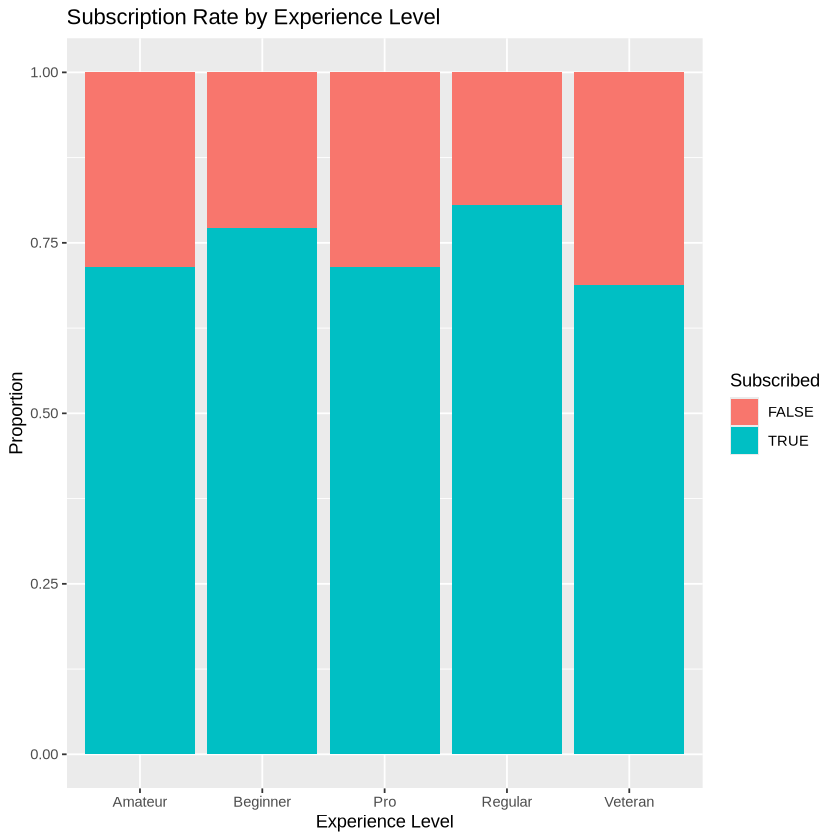

In [9]:
players |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Proportion",
       fill = "Subscribed") 

The table shows the number of players who subscribed versus those who did not. There are more subscribers than non-subscribers in this dataset. This means the classes are not perfectly balanced, which is important to keep in mind for modelling because unequal class sizes may influence some methods.

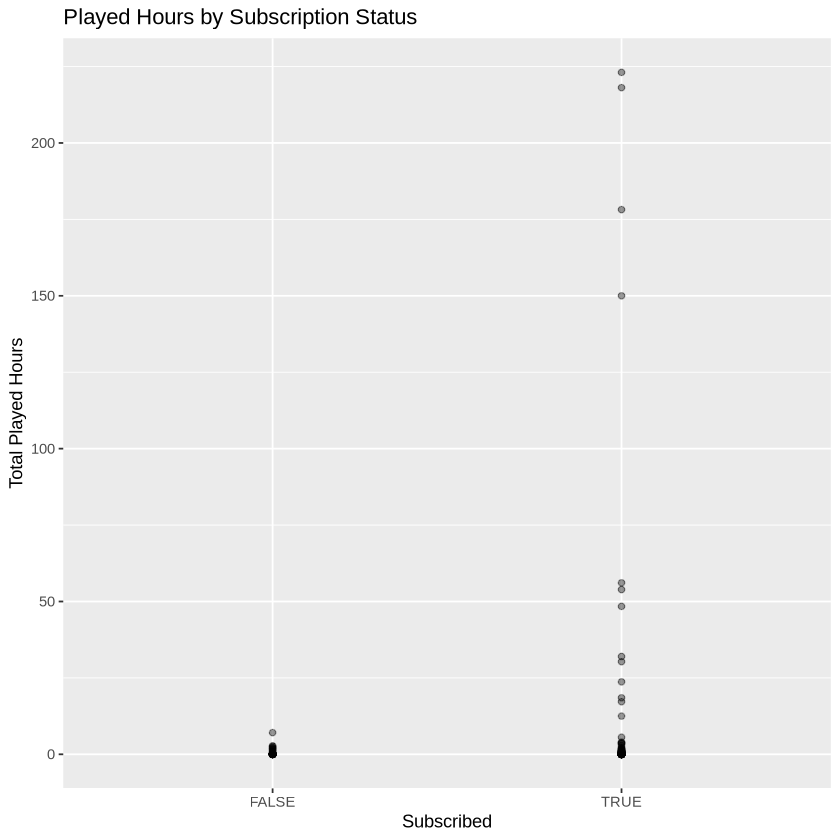

In [10]:
players |>
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_point(alpha = 0.4) +
  labs(title = "Played Hours by Subscription Status",
       x = "Subscribed",
       y = "Total Played Hours") 

This graph shows the difference in total playtime between players who subscribed and players who did not. We can see that the players who subscribed usually have more hours played. This suggests that players who spend more time in the game are more likely to subscribe because they are more engaged with the game.


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


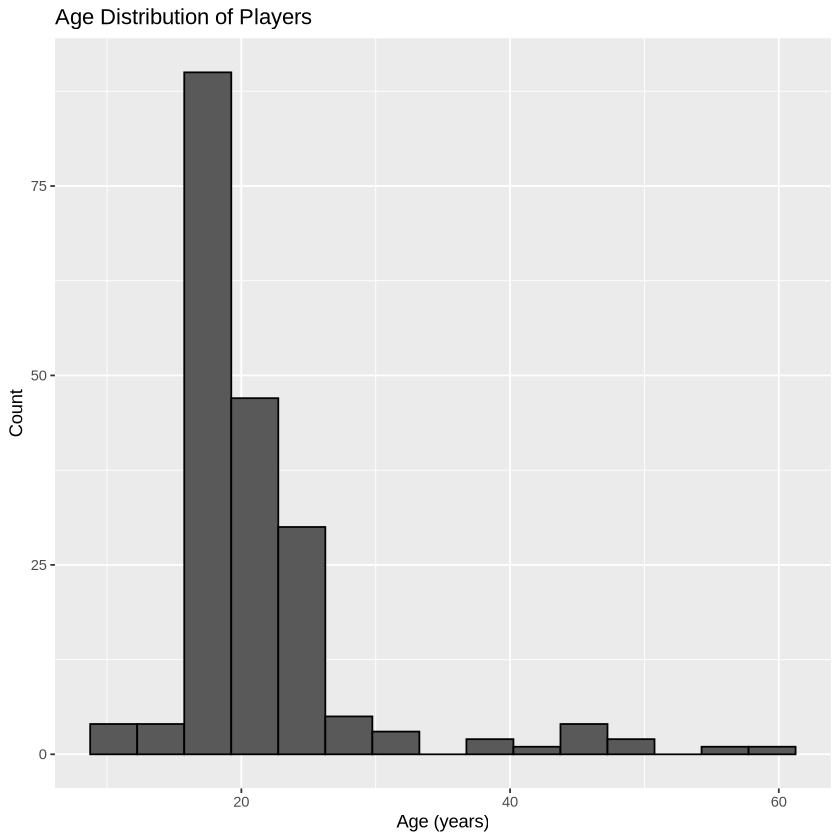

In [11]:
players |>
  ggplot(aes(x = Age)) +
  geom_histogram(bins = 15, color = "black") +
  labs(title = "Age Distribution of Players",
       x = "Age (years)",
       y = "Count") 

This histogram shows the ages of players in the dataset. 
Most players in this dataset are younger, with the majority in their teens and early twenties. Since both subscribers and non-subscribers come from this same age range, age alone may not strongly distinguish subscription behavior. However, understanding the age range helps to understand whether age could affect subscription choices.

## 4. Methods and Plan

To answer our question, we will use a **K-Nearest Neighbors (KNN) classification model** to predict whether a player subscribes to the newsletter based on their characteristics (experience, played_hours, age, and gender).


### Why This Method is Appropriate

KNN works well for this problem because subscribe is a TRUE/FALSE variable, and KNN is commonly used for this type of classification. KNN also does not assume a straight-line (linear) relationship between the variables and the outcome. Instead, it makes predictions by looking at players who are similar to each other. So if players with similar playtime, age, or experience tend to subscribe, the model will learn that pattern. This makes KNN a good choice for capturing how different player characteristics relate to subscription.

### Assumptions

KNN does not have many strict assumptions, but there are a few things we need to do before using it. First, the numeric variables need to be **scaled**, because KNN compares distances between points. Also, the categorical variables (**experience** and **gender**) need to be converted to factors or encoded so the model can read them properly. Finally, we need to choose a good value for **k** (the number of neighbors), because this choice can change how well the model performs.

### Potential Limitations

- KNN can be affected by variables that do not actually help with prediction, which may reduce accuracy.
- Since we have more subscribers than non-subscribers, the model might lean toward predicting “subscribe” more often.
- The performance of the model depends a lot on choosing a good value for k.
  
Additionally, KNN can be slower with large datasets, although dataset size here is manageable.


### Model Selection and Comparison

To select the best KNN model, I will:
- Test multiple values of **k** (e.g., 3, 5, 7, 9, …)
- Use **cross-validation** on the training dataset to determine which value of k performs best
  
Compare models based on:
- Accuracy
- Confusion Matrix results
- Sensitivity and specificity

These measures will help me understand how well the model predicts who subscribes.

## Data Processing and Splitting Plan

Before modelling, I will:
- Convert **experience** and **gender** into categorical variables.
- Standardize the numeric variables (**played_hours** and **Age**) so that distance comparisons are fair.

I will split the data into:
- **Training set**: 80%
- **Test set**: 20%

The training set will be used to tune the model and choose the best value of **k** using cross-validation.
The test set will only be used once at the end to check how well the final model performs.